<a href="https://colab.research.google.com/github/uto4ka101/First/blob/main/%22data_classifition_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
import graphviz
from sklearn.tree import export_graphviz 
from IPython.display import SVG

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data.csv',encoding='utf-8').drop(columns=['Unnamed: 0', 'id', 'key']).set_index(['artists', 'name']) 
data.head()

,,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
artists,name,,,,,,,,,,,,,,,
['Dennis Day'],Clancy Lowered the Boom,0.732,0.819,180533,0.341,0,0.000000,0.160,-12.441,1,8,1921,0.4150,60.936,0.9630,1921
"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']","Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",0.982,0.279,831667,0.211,0,0.878000,0.665,-20.096,1,5,1921,0.0366,80.954,0.0594,1921
['John McCormack'],The Wearing of the Green,0.996,0.518,159507,0.203,0,0.000000,0.115,-10.589,1,6,1921,0.0615,66.221,0.4060,1921
"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']","Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",0.982,0.279,831667,0.211,0,0.878000,0.665,-20.096,1,4,1921,0.0366,80.954,0.0594,1921
['Phil Regan'],When Irish Eyes Are Smiling,0.957,0.418,166693,0.193,0,0.000002,0.229,-10.096,1,4,1921,0.0380,101.665,0.2530,1921


In [ ]:
data.release_date = pd.to_datetime(data.release_date, yearfirst=True) 
data.release_date = data.release_date.dt.year

In [ ]:
data.head(3)

,,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
artists,name,,,,,,,,,,,,,,,
['Dennis Day'],Clancy Lowered the Boom,0.732,0.819,180533,0.341,0,0.000,0.160,-12.441,1,8,1970,0.4150,60.936,0.9630,1921
"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']","Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",0.982,0.279,831667,0.211,0,0.878,0.665,-20.096,1,5,1970,0.0366,80.954,0.0594,1921
['John McCormack'],The Wearing of the Green,0.996,0.518,159507,0.203,0,0.000,0.115,-10.589,1,6,1970,0.0615,66.221,0.4060,1921


In [ ]:
X = data.drop(columns=['popularity']) 
y = data.popularity

NameError: ignored

In [ ]:
clf = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=5)

In [ ]:
clf.fit(X,y)

In [ ]:
clf.feature_importances_

In [ ]:
pd.DataFrame(data = clf.feature_importances_ , index=X.columns, columns=['feature_importances_ ' ] )

,feature_importances_
acousticness,0.018412
danceability,0.000000
duration_ms,0.004993
energy,0.000000
explicit,0.000000
instrumentalness,0.000000
liveness,0.000000
loudness,0.000000
mode,0.000000
release_date,0.000000


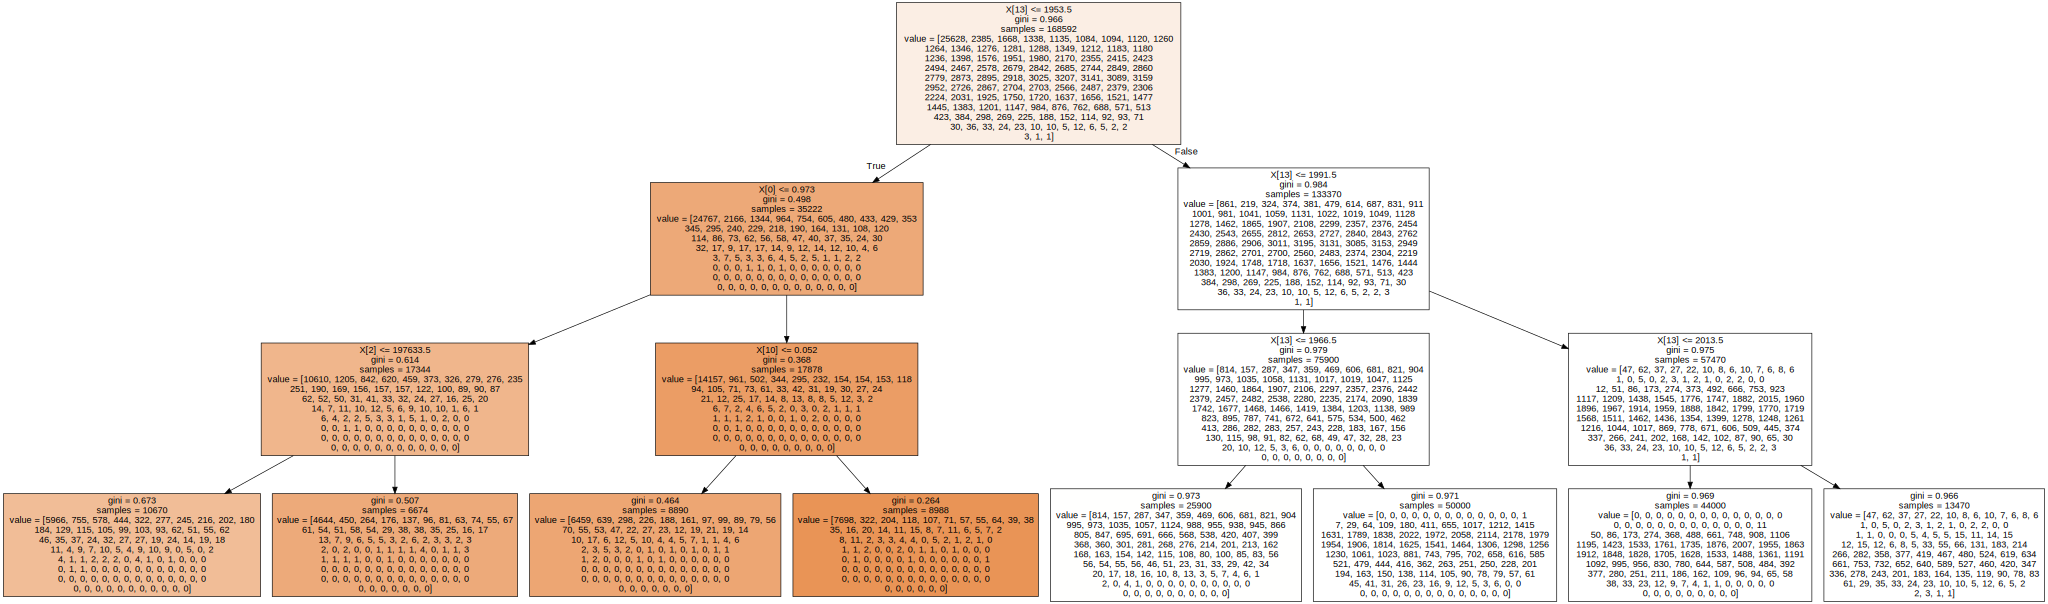

In [ ]:
dot_data = export_graphviz(clf, out_file=None, filled=True) 
graph = graphviz.Source(dot_data) 
display(SVG(graph.pipe(format='svg')))